
# Project 2: Appointmens data of brazilian clinic

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this datset we have informations about medical appointments in Brazil at the years of 2015 and 2016, the data describes the patient day of schedule and appointment, confirms if him/her showed up or not and have other variables related to the patient, like diseases, age, government bennefit etc.
> We are going to analise what variables are related with the patient showing up or not and the desiases
>Those who receive the government benefit are more likely to show up? The waiting days have some influence on it? the SMS system is working good? And what about the diseases, it has some relation with the age of the patients, or the gender?

In [1]:
import pandas as pd
from datetime import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='wrangling'></a>
## Data Wrangling

>At first we are going to analyse the data frame, and see what we can do to make it better to answer our questions

### General Properties

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


One of our question is about the influence of waiting time, checking the df.head() we can see that it's going to be necessary to clean the way the columns "SchedueledDay" and "AppointmentDay" are showing and also create a new column with the waiting days.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The "ScheduledDay" and "AppointmentDay" are with int type instead of date type. And we can see that there's no missing data.

In [5]:
df.duplicated().sum()

0

There's no duplicated values as well

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
Hipertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
Handcap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
SMS_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


### Converting the datatype and creating the Waiting days column

To converd the columns that contain dates, I'm going to define a function for it.

The appointment day don't have a time scheduled, so i'm going at first i'm going to make both columns with only the year-month-day

In [8]:
df['ScheduledDay'] = df['ScheduledDay'].str[:10] ##The dates are as srting format
df['AppointmentDay'] = df['AppointmentDay'].str[:10]

In [9]:
def convert_date(date): ##this function will convert strings to dates
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')

In [10]:
date_columns = ['ScheduledDay', 'AppointmentDay']

for d in date_columns:
    df[d] = df[d].apply(convert_date)

In [11]:
df['Waiting_days'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [12]:
df['Waiting_days'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Waiting_days, dtype: float64

After applying the describe function for the new column, I found out that some lines were probably with the scheduled day after the appointment day, and this don't make much sense.
So I'm going to apply a query and check on that.

In [13]:
df.query('ScheduledDay > AppointmentDay')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Waiting_days
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


Let's drop this lines

In [14]:
df.drop(df.loc[df['ScheduledDay']>df['AppointmentDay']].index, inplace=True)

In [15]:
df.query('ScheduledDay > AppointmentDay')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Waiting_days


In [16]:
df['Waiting_days'].describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Waiting_days, dtype: float64

The columns Scholarship, Hipertension, Diabetes, Alcoholism and SMS_received are using 1 and 0 as yes or no. To make it easy work with it I decided to convert into True and False.

In [17]:
columns_tf = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received']
for c in columns_tf:
    df[c] = df[c].map({1: True, 0: False})

In [18]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Waiting_days
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,No,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,No,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,No,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,No,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,No,0


### Cleaning the Age Column

In [19]:
df.describe()['Age']

count    110522.000000
mean         37.089041
std          23.110064
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis



### Q1: Patients that receive SMS are more likely to show up?

In [20]:
df['SMS_received'].value_counts() #most of the patients didn't receive the SMS

False    75040
True     35482
Name: SMS_received, dtype: int64

In [21]:
sms_true = df.query('SMS_received == True')

In [22]:
sms_false = df.query('SMS_received == False')

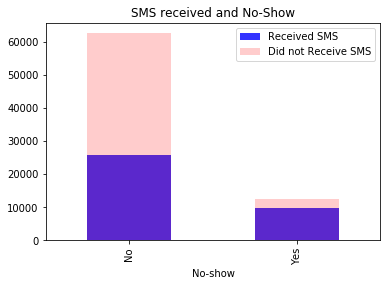

In [23]:
sms_true.groupby('No-show')['Age'].count().plot(kind='bar', alpha=0.8, color='blue', label='Received SMS');
sms_false.groupby('No-show')['Age'].count().plot(kind='bar', alpha=0.2, color='red', label='Did not Receive SMS');
plt.legend();
plt.title('SMS received and No-Show');

It's hard to tell because most of the patients did not receive the SMS, let's check how it works making it proportional

In [24]:
sms_counts = df.groupby(['SMS_received', 'No-show']).count()['Age']

sms_counts

SMS_received  No-show
False         No         62510
              Yes        12530
True          No         25698
              Yes         9784
Name: Age, dtype: int64

In [25]:
sms_total = df.groupby('SMS_received')['Age'].count()

sms_total

SMS_received
False    75040
True     35482
Name: Age, dtype: int64

In [26]:
sms_true = sms_counts[True] / sms_total[True]

sms_true

No-show
No     0.724255
Yes    0.275745
Name: Age, dtype: float64

In [27]:
sms_false = sms_counts[False] / sms_total[False]

sms_false

No-show
No     0.833022
Yes    0.166978
Name: Age, dtype: float64

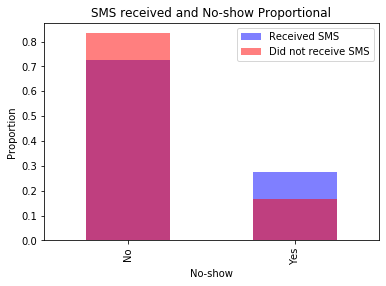

In [28]:
sms_true.plot(kind='bar', color='blue', alpha=0.5, label='Received SMS');
sms_false.plot(kind='bar', color='red', alpha=0.5, label='Did not receive SMS');
plt.title('SMS received and No-show Proportional')
plt.ylabel('Proportion')
plt.legend();

It looks like the SMS system is not very effective, patients that received the sms had more no-show than those who didn't receive it

### Q2: Patients that wait longer are more likely to no-show ?

In [29]:
df.groupby('No-show')['Waiting_days'].mean()


No-show
No      8.754659
Yes    15.835484
Name: Waiting_days, dtype: float64

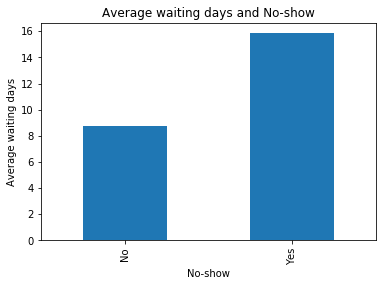

In [30]:
df.groupby('No-show')['Waiting_days'].mean().plot(kind='bar');
plt.ylabel('Average waiting days');
plt.title('Average waiting days and No-show');


Yes, it looks like that patients with longer waiting time had showed up less.

## Q3: Patients that receive scholarship ("Bolsa Família") are more likely to no-show?

In [31]:
df.groupby('Scholarship').count()['Age']

Scholarship
False    99661
True     10861
Name: Age, dtype: int64

In [32]:
10861 / (99661 + 10861) ##Only 9.8% of the total receive scholarship, so to make it more fair let's do it proportional

0.0982700276867954

In [33]:
bf_counts = df.groupby(['Scholarship', 'No-show']).count()['Age']

bf_counts

Scholarship  No-show
False        No         79925
             Yes        19736
True         No          8283
             Yes         2578
Name: Age, dtype: int64

In [34]:
bf_total = df.groupby('Scholarship').count()['Age']

bf_total

Scholarship
False    99661
True     10861
Name: Age, dtype: int64

In [35]:
bf_true = bf_counts[True] / bf_total[True]

bf_true

No-show
No     0.762637
Yes    0.237363
Name: Age, dtype: float64

In [36]:
bf_false = bf_counts[False] / bf_total[False]

bf_false

No-show
No     0.801969
Yes    0.198031
Name: Age, dtype: float64

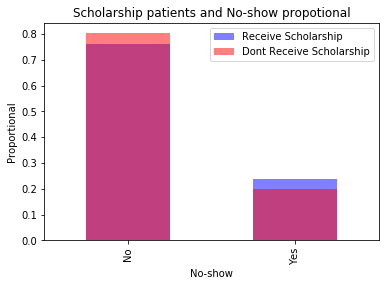

In [37]:
bf_true.plot(kind='bar', alpha=0.5, color='blue', label='Receive Scholarship');
bf_false.plot(kind='bar', alpha=0.5, color='red', label='Dont Receive Scholarship');
plt.ylabel('Proportional');
plt.title('Scholarship patients and No-show propotional')
plt.legend();

Yes, apparently patients that receive the scholarship "Bolsa Família" are more likely to have no-show

### Q4: Is there any relations between the age of the patients and the diseases?

In [38]:
diseases = ['Hipertension', 'Diabetes', 'Alcoholism']
df_d = df.groupby('Age')[diseases].sum()

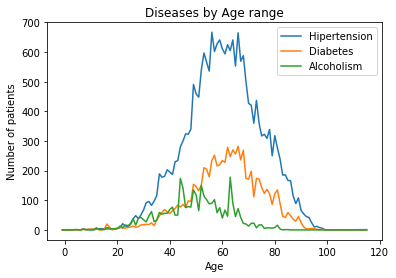

In [39]:
df_d.plot(kind='line');
plt.ylabel('Number of patients');
plt.title('Diseases by Age range');

In [40]:
corr_diseases = df_d.corr()
corr_diseases.style.background_gradient(cmap='coolwarm')

,Hipertension,Diabetes,Alcoholism
Hipertension,1.000000,0.978554,0.650804
Diabetes,0.978554,1.000000,0.562730
Alcoholism,0.650804,0.562730,1.000000


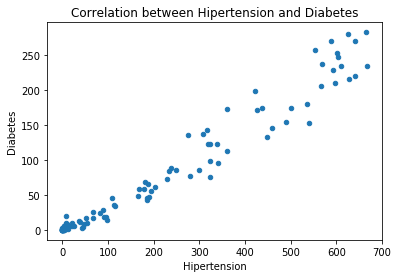

In [41]:
df_d.plot.scatter(x='Hipertension', y='Diabetes');
plt.title('Correlation between Hipertension and Diabetes');

Hipertension is the most common disease,
Alcoholism seems to be present more  in adults,
Diabetes it's more common at the elders
Hipertension and Diabetes are very correlated

## Q5: How the diseases behave by gender?

In [42]:
gd = df.groupby('Gender')[diseases].sum()

gd

,Hipertension,Diabetes,Alcoholism
Gender,,,
F,15339.0,5606.0,1223.0
M,6462.0,2337.0,2137.0


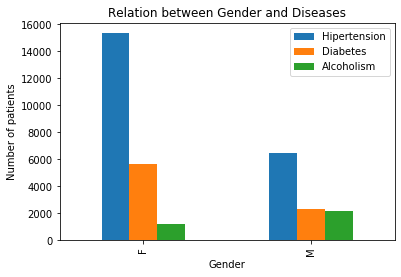

In [43]:
gd.plot(kind='bar');
plt.ylabel('Number of patients');
plt.title('Relation between Gender and Diseases');

<a id='conclusions'></a>
## Conclusions

> This dataset was full of informations and there are multiple ways to analyse it, the questions made here focused in two aspects:

> What can have influence in the No-show? and how the diseases are related with the age of the patients and also with itselfs?

> To answer the first topic, we looked first at the SMS system, it make sense that patients that receive SMS will have less chances of forgetting the appointment. However, what we verified was that most of the patients didn't get SMS and even the small group that received it, they  had more no-show if compared with those that did not receive it.

> The second question related to no-show was about the waiting time, patients that wait longer are less likely to show up.

> The scholarship "Bolsa Família" is a large government program for income distribution in Brazil, so the families that receive it usually have lower incomes and strugle more. We asked if the families that receive this bennefit are more likely to have a no-show, the answer was yes.

> About the diseases, when we plotted by age, the line graph showed that the most common disease is hipertension, alcohlism is more common in adults and diabetes in the elders. There is also a very close correletion between Hipertension and Diabetes.

> After that we ploted by gender, and looks like Men are way more likely to have alcoholism than Women, even though there was way more men patients than women.

## Limitations

> There is a lot of information in the dataset, but the timeline is too short to make definitve conclusions.

> It would be intersting to know the method of transportation of the patients.

> It would be good to have a column with patient job/occupation.

## References
>Reference 1: To drop the line with inconsistent dates:

https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

>Reference 2: To convert the 1 and 0 to True and False:

https://www.w3resource.com/python-exercises/pandas/python-pandas-data-frame-exercise-17.php

>Reference 3: To convert string into data format:

https://www.w3resource.com/pandas/dataframe/dataframe-apply.php

>Reference 4: Correlation graph:

https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas